In [14]:
# Steps to solve the problem

In [15]:
# ----------------------------
# Step 0 - import Libraries
# ----------------------------

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [214]:
# -----------------------
# Step1 - Read the data
# -----------------------

In [215]:
bikes = pd.read_csv('hour.csv')

In [216]:
bikes.shape

(17379, 17)

In [217]:
bikes.head(5)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [218]:
# ---------------------------------------------
# Step 2 - Prelim Analysis and Feature selection
# ----------------------------------------------

In [219]:
bikes_prep = bikes.copy()

In [220]:
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis = 1)

In [221]:
bikes_prep.shape

(17379, 13)

In [222]:
bikes_prep.head(5)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [223]:
# Basic checks of missing values

In [224]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

In [225]:
# visualise the data using pandas histogram

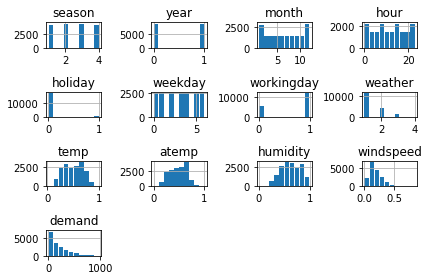

In [226]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

In [227]:
# Conclusion:
# - Predicted variable demand is not normally distributed

In [228]:
# ------------------------
# Step 3 - Data Visualisation
# ------------------------

In [229]:
# Visualise the continuous features Vs demand

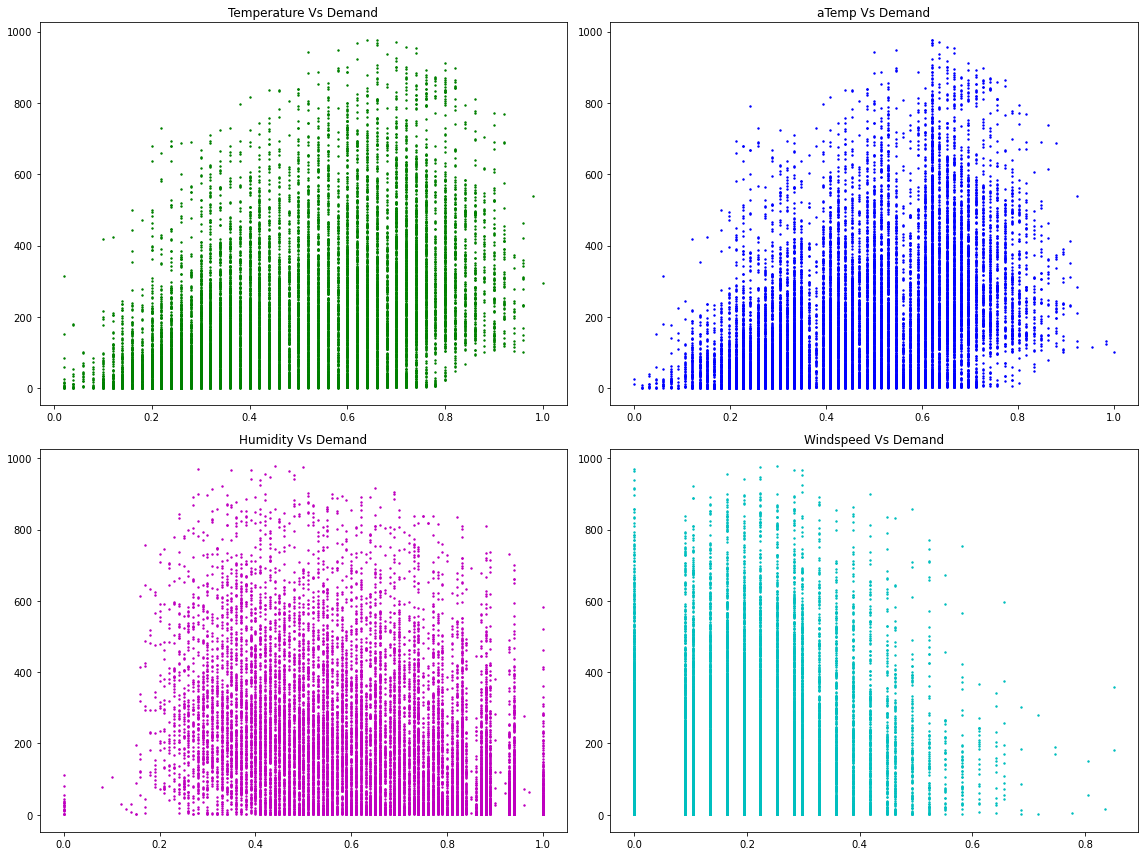

In [230]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s = 2, c = 'g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s =2, c = 'b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s =2, c = 'm')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s =2, c = 'c')

plt.tight_layout()
plt.show()

In [231]:
#  Plot the categorical features vs demand

In [232]:
# Create unique seasons values
cat_list = bikes_prep['season'].unique()

In [233]:
# Create average demand per season using groupby
cat_average = bikes_prep.groupby('season').mean()['demand']

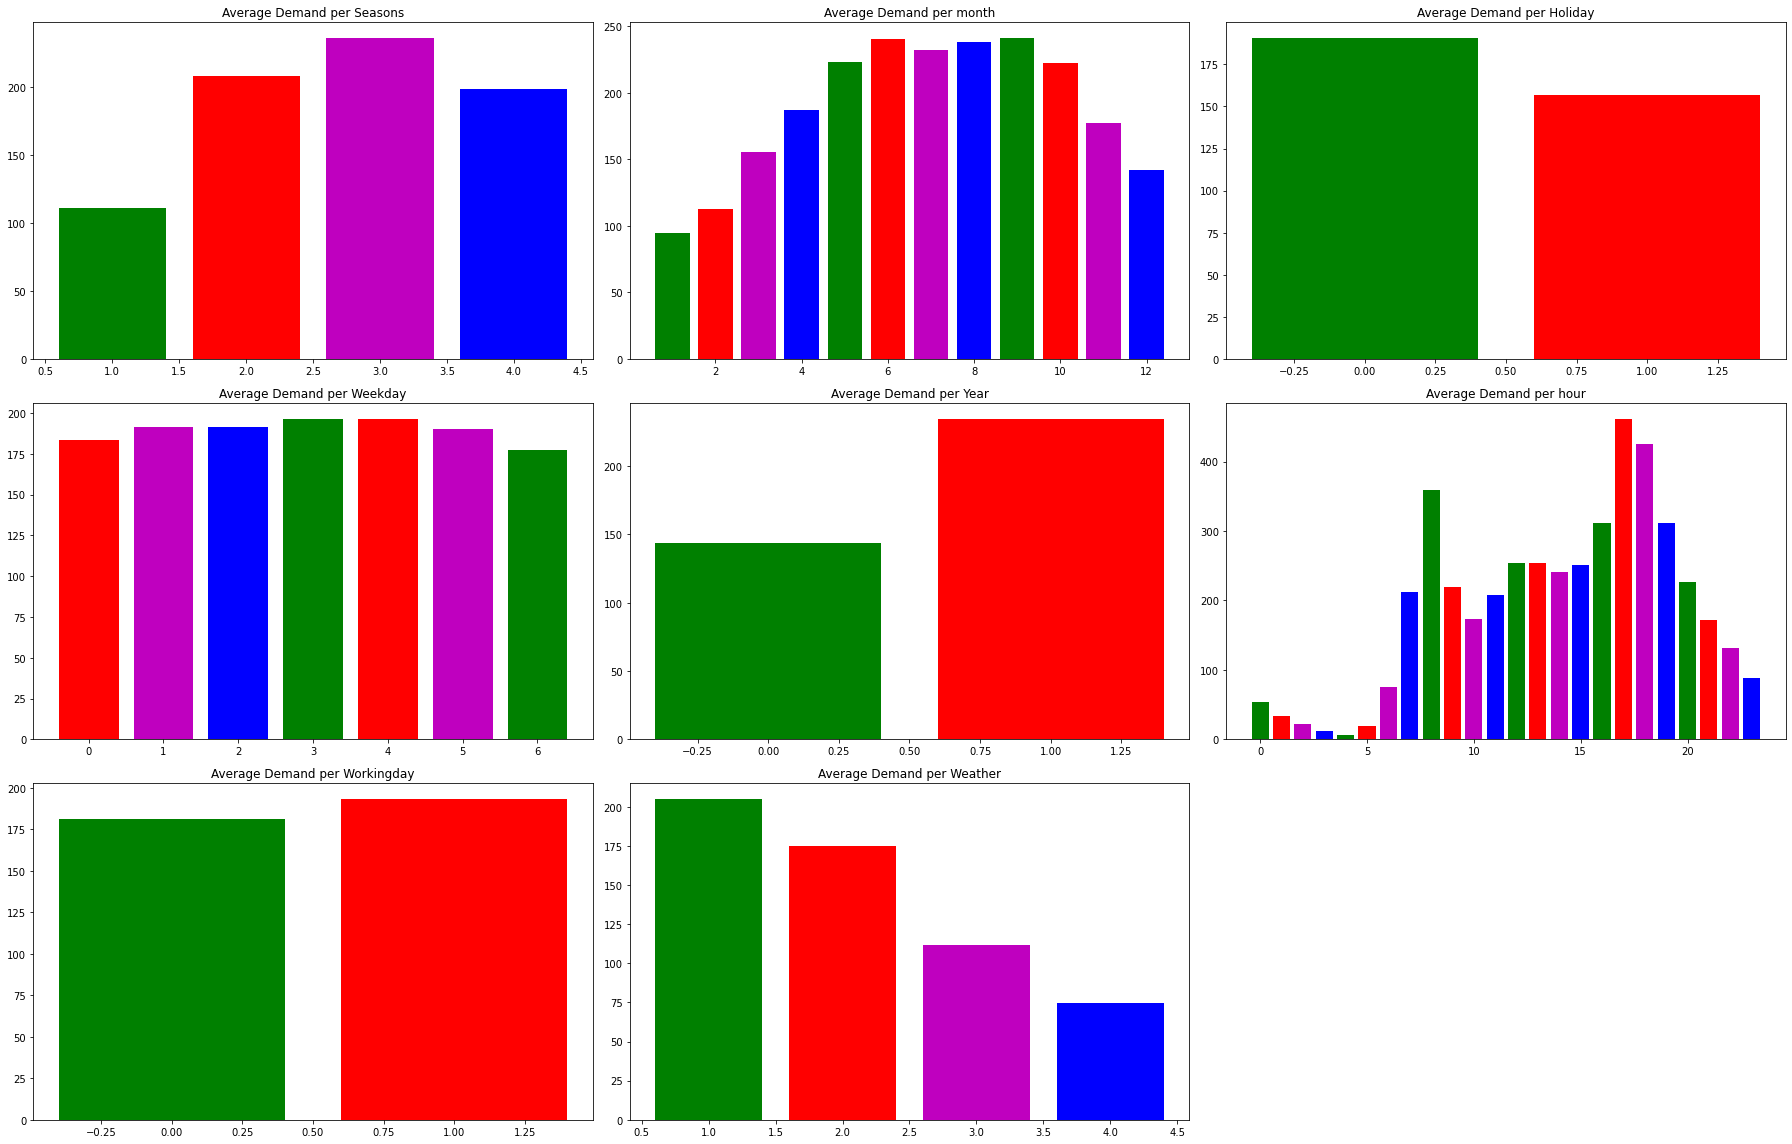

In [234]:
plt.figure(figsize=(25,16))

plt.subplot(3,3,1)
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.title("Average Demand per Seasons")
colours = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,2)
plt.title("Average Demand per month")
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,3)
plt.title("Average Demand per Holiday")
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,4)
plt.title("Average Demand per Weekday")
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,5)
plt.title("Average Demand per Year")
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,6)
plt.title("Average Demand per hour")
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,7)
plt.title("Average Demand per Workingday")
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.subplot(3,3,8)
plt.title("Average Demand per Weather")
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

plt.tight_layout()
plt.show()

In [235]:
# Features to be dropped
# weakday
# year
# working day

<BarContainer object of 24 artists>

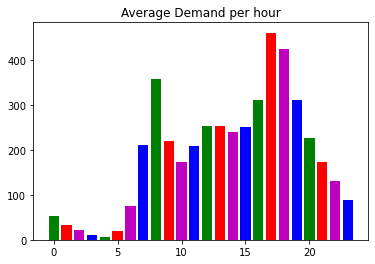

In [236]:
plt.title("Average Demand per hour")
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color = colours)

In [237]:
# Demand is not normally distribution
# Temperature and demand has direct correlation
# The plot for temperature and atemp appear almost identical
# Humidity and wind speed affect demand but need more statistical analysis

In [238]:
# There is variation in demand based on 
# season month holiday hour weather

In [239]:
# No significant change in demand due to weekday or working day
# Year-wise growth pattern not considered due to limited number of year

In [240]:
# --------------
# check for outliers
# --------------

In [241]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [242]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [243]:
# -----------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# -----------------------------------------------------

In [244]:
# Linearity using correlation coefficient matrix using corr

In [245]:
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [246]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [247]:
# drop atemp and windspeed

In [248]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis = 1)

In [249]:
bikes_prep.head(8)

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
5,1,1,5,0,2,0.24,0.75,1
6,1,1,6,0,1,0.22,0.80,2
7,1,1,7,0,1,0.20,0.86,3


In [250]:
bikes_prep.shape

(17379, 8)

In [251]:
# Check the autocorrelation in demand using acorr

In [252]:
df1 = pd.to_numeric(bikes_prep['demand'], downcast= 'float')

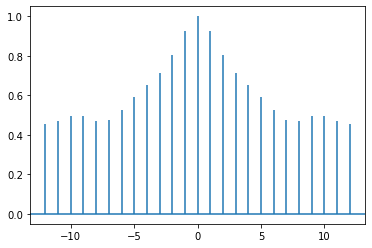

In [253]:
plt.acorr(df1,maxlags = 12)
plt.show()

In [254]:
# there is high autocorrelation for the demand feature

In [255]:
# ----------------------------------
# Step 6 - Create / Modify new features
# -----------------------------------

In [256]:
# Log Normalise the feture 'demand'

In [257]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

<AxesSubplot:>

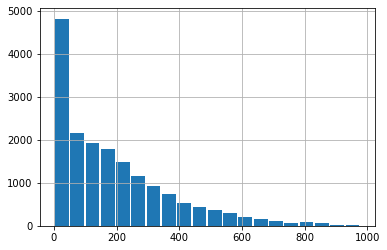

In [258]:
plt.figure()
df1.hist(rwidth = 0.9, bins = 20)

<AxesSubplot:>

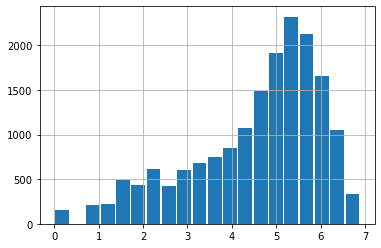

In [259]:
plt.figure()
df2.hist(rwidth = 0.9, bins = 20)

In [260]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [261]:
# Autocorrelation in the demand column

In [262]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [263]:
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3], axis=1)

In [264]:
bikes_prep_lag.head(5)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [265]:
bikes_prep_lag.isnull().sum()

season      0
month       0
hour        0
holiday     0
weather     0
temp        0
humidity    0
demand      0
t-1         1
t-2         2
t-3         3
dtype: int64

In [266]:
bikes_prep_lag.shape

(17379, 11)

In [267]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [268]:
bikes_prep_lag.isnull().sum()

season      0
month       0
hour        0
holiday     0
weather     0
temp        0
humidity    0
demand      0
t-1         0
t-2         0
t-3         0
dtype: int64

In [269]:
bikes_prep_lag.shape

(17376, 11)

In [270]:
# -----------------------------------------------------------
# Step 7 - Create Dummy Variables and drop first
#          to avoid dummy variables trap using get_dummies
# -----------------------------------------------------------

In [271]:
# - season, holiday, weather, month, hour

In [272]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [293]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

In [294]:
bikes_prep_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [295]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [296]:
bikes_prep_lag.head(5)

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [316]:
bikes_prep_lag.shape

(17376, 47)

In [317]:
bikes_prep_lag.dtypes

temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
season_2       uint8
season_3       uint8
season_4       uint8
month_2        uint8
month_3        uint8
month_4        uint8
month_5        uint8
month_6        uint8
month_7        uint8
month_8        uint8
month_9        uint8
month_10       uint8
month_11       uint8
month_12       uint8
hour_1         uint8
hour_2         uint8
hour_3         uint8
hour_4         uint8
hour_5         uint8
hour_6         uint8
hour_7         uint8
hour_8         uint8
hour_9         uint8
hour_10        uint8
hour_11        uint8
hour_12        uint8
hour_13        uint8
hour_14        uint8
hour_15        uint8
hour_16        uint8
hour_17        uint8
hour_18        uint8
hour_19        uint8
hour_20        uint8
hour_21        uint8
hour_22        uint8
hour_23        uint8
holiday_1      uint8
weather_2      uint8
weather_3      uint8
weather_4      uint8
dtype: object

In [318]:
# ----------------------------------------------------
# Step 8 - Create Train and Test split
# ----------------------------------------------------

In [319]:
# Split the x and y dataset into training and testing set

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
# demand is time dependent or time series
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis = 1)

In [322]:
# Create the size for 70% of the data
tr_size = 0.7 * len(X)
tr_size = int(tr_size)

In [323]:
tr_size

12163

In [324]:
X_train = X.values[0: tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0: tr_size]
Y_test = Y.values[tr_size:len(X)]

In [325]:
# --------------------------------------
# 9. Fit and score the model
# ----------------------------------------

In [326]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [327]:
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

LinearRegression()

In [328]:
r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

In [329]:
r2_train

0.9195240591465778

In [330]:
r2_test

0.9287151360253386

In [331]:
Y_predict = std_reg.predict(X_test)

In [332]:
# calculate root mean squared value

In [333]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [334]:
rmse

0.3809880049817043

In [335]:
# Final Step - Calculate RMSLE and compare results

In [336]:
Y_test_e = []

In [337]:
Y_predict_e = []

In [338]:
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

In [340]:
# Do the sum of the logs and squares (RMSLE)
log_sq_sum = 0.0
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i]+1)
    log_p = math.log(Y_predict_e[i]+1)
    log_diff = (log_a - log_p)**2
    log_sq_sum = log_sq_sum + log_diff

In [341]:
rmsle = math.sqrt(log_sq_sum/len(Y_test))

In [342]:
rmsle

0.3560941706980208